# E05: Moran effect

In [13]:
import os, sys
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.colors as mcolors # type: ignore
sys.path.append(os.path.abspath('../utils'))
import surd as surd
np.random.seed(10)

# Configure matplotlib to use LaTeX for text rendering and set font size
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

## System definition

In [14]:
def moran_effect(N, r1, r2, s1, s2, D1, D2, psi1, psi2, R0, N0):
    # Initialize arrays for the state variables with zeros
    R1 = np.zeros(N)
    R2 = np.zeros(N)
    N1 = np.zeros(N)
    N2 = np.zeros(N)
    v = np.random.normal(0, 1, N)
    
    # Initial values for R1, R2, N1, and N2
    R1[0] = R0
    R2[0] = R0
    N1[0] = N0
    N2[0] = N0

    # Simulate the system over N time steps
    for t in range(3, N-1):
        
        R1[t+1] = r1 * N1[t] * (1 - N1[t]) * np.exp(-psi1 * v[t])
        N1[t+1] = s1 * N1[t] + max(R1[t - D1], 0)
        
        R2[t+1] = r2 * N2[t] * (1 - N2[t]) * np.exp(-psi2 * v[t])
        N2[t+1] = s2 * N2[t] + max(R2[t - D2], 0)
    
    return R1, N1, R2, N2

## Problem set-up

In [15]:
N = 10**7           # Number of time steps
r1 = 3.4            # Growth rate for R
r2 = 2.9            # Growth rate for R
s1 = 0.4            # Growth rate for N
s2 = 0.35           # Growth rate for N
D = 4               # Delay
psi1 = 0.5          # Parameter psi
psi2 = 0.6          # Parameter psi
R0 = 1              # Initial value of R
N0 = 0.5            # Initial value of N

R1, N1, R2, N2 = moran_effect(N, r1, r2, s1, s2, D1=D, D2=D, psi1=psi1, psi2=psi2, R0=R0, N0=N0)

In [16]:
samples = N
X = np.array([N1, N2])
nbins = 50
nlag = 1
nvars = X.shape[0]
n_vars_lag = X.shape[0] * nlag

## Time signals

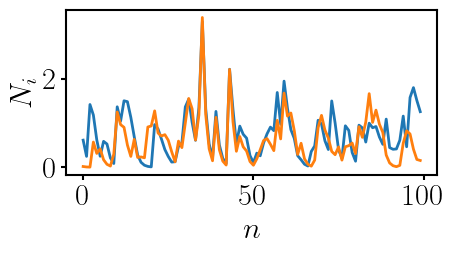

In [17]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 1, figsize=(5, 3))

for i in range(nvars):
    axs.plot(X[i, -100:], linewidth=2)

axs.set_ylabel(f'$N_i$')
axs.set_xlabel(f'$n$')

# Adjust layout
plt.tight_layout()

# change all spines
for axis in ['top','bottom','left','right']:
    axs.spines[axis].set_linewidth(1.5)

# increase tick width
axs.tick_params(width=1.5)

# Show plot
plt.show()

## Causality analysis

SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.1633
    Unique (U):
        (1,)        : 0.8260
        (2,)        : 0.0000
    Synergystic (S):
        (1, 2)      : 0.0106
    Information Leak: 86.22%


SURD CAUSALITY FOR SIGNAL 2
    Redundant (R):
        (1, 2)      : 0.1943
    Unique (U):
        (1,)        : 0.0000
        (2,)        : 0.7973
    Synergystic (S):
        (1, 2)      : 0.0083
    Information Leak: 90.86%




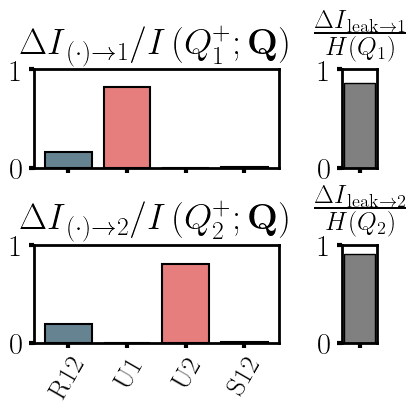

In [18]:
# Prepare Subplots
fig, axs = plt.subplots(nvars, 2, figsize=(9, 2.3*nvars), gridspec_kw={'width_ratios': [35, 1]})
I_R, I_S, MI, info_leak = surd.run(X, nvars, nlag, nbins, axs)

plt.tight_layout(w_pad=-12, h_pad=0)
plt.show()